Enter image url: sample.jpg
Enter confidence threshold (0-1): 4
Default confidence 0.5 is choosen
person 99.87797141075134
laptop 98.40595722198486
chair 95.04749774932861
person 98.54730367660522
person 98.62667918205261
person 97.28602170944214
laptop 98.45237135887146
chair 61.354970932006836
laptop 99.88952875137329
bottle 65.60758948326111
mouse 80.27846813201904
cell phone 53.6768913269043


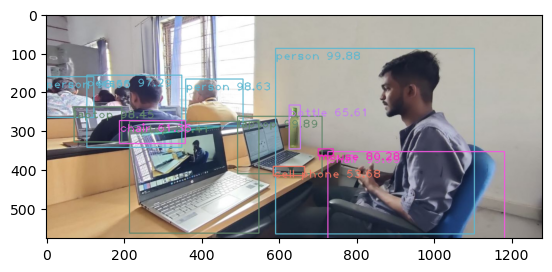

Do you want to save the annotated image? (yes/no): n
file not saved


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load YOLOv3 model
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

# Load classes
classes = []
with open('coco.names', 'r') as f:
    classes = f.read().strip().split('\n')

# Load image
image = cv2.imread(input("Enter image url: "))
height, width = image.shape[:2]

def set_confidence_threshold():
        threshold = float(input("Enter confidence threshold (0-1): "))
        if 0 <= threshold <= 1:
            return threshold
        else:
            print("Default confidence 0.5 is choosen")
            return 0.5

con_tresh = set_confidence_threshold()        

# Preprocess the image for YOLO
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)

# Set the input to the network
net.setInput(blob)

# Run forward pass
outs = net.forward(net.getUnconnectedOutLayersNames())

# Initialize lists to store detected objects' information
boxes = []
confidences = []
class_ids = []

# Loop over each output layer
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > con_tresh:  # You can adjust this threshold
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Apply non-maximum suppression to remove overlapping boxes
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Draw bounding boxes and labels with custom colors
font = cv2.FONT_HERSHEY_PLAIN

# Define your custom class-color dictionary
class_colors={'person': '#d0b75e','bicycle': '#48db6d','car': '#64dabd', 'motorbike': '#48d308','aeroplane': '#3e296f','bus': '#e76d43','train': '#b1d39b','truck': '#620140','boat': '#9c0cc1','traffic light': '#dfad73','fire hydrant': '#2d8bde','stop sign': '#3c53b4','parking meter': '#4240c6','bench': '#3f7cad','bird': '#30fcb1','cat': '#ae0d7e','dog': '#65a8cd','horse': '#332e06','sheep': '#8d6d89','cow': '#77ea82','elephant': '#63de7a','bear': '#8d57ab','zebra': '#16059b','giraffe': '#c28bc','backpack': '#f6a5fc','umbrella': '#a7e10e', 'handbag': '#1926d2','tie': '#3e35e5','suitcase': '#9c48d','frisbee': '#a57649','skis': '#b14fb5','snowboard': '#736b43','sports ball': '#346f28', 'kite': '#a6a096', 'baseball bat': '#fa5489', 'baseball glove': '#bdfd2c', 'skateboard': '#9b760f','surfboard': '#f9d740','tennis racket': '#819ef0', 'bottle': '#f27dc7', 'wine glass': '#ef794a', 'cup': '#d5c2a3', 'fork': '#8d077a', 'knife': '#11de8e', 'spoon': '#ce7629', 'bowl': '#7dd958', 'banana': '#26bb13', 'apple': '#7973be', 'sandwich': '#c8ea20', 'orange': '#61b31', 'broccoli': '#b0f1d', 'carrot': '#f4d38a', 'hot dog': '#4294c8', 'pizza': '#9b0b83', 'donut': '#2e0a08', 'cake': '#f6922e', 'chair': '#e056f3', 'sofa': '#bd955a', 'pottedplant': '#8be20b', 'bed': '#706633','diningtable': '#7cb3b7','toilet': '#793bb8', 'tvmonitor': '#a24789', 'laptop': '#6b8763', 'mouse': '#be2af4', 'remote': '#116614', 'keyboard': '#2c7b3f','cell phone': '#6174ec', 'microwave': '#775c4a', 'oven': '#882ea0', 'toaster': '#e4bb39', 'sink': '#b8889', 'refrigerator': '#209bc8', 'book': '#b4577e', 'clock': '#753eda', 'vase': '#9b75a9','scissors': '#6188d', 'teddy bear': '#3d1b32','hair drier': '#c03e6', 'toothbrush': '#fc7ca'}

for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = confidences[i] * 100
        print(label,confidence)

for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = confidences[i] * 100
        
        # Get the color from the custom class-color dictionary
        color = class_colors.get(label, '#FFFFFF')  # Default to white if not found in the dictionary
        
        # Convert color from hex to BGR
        color = tuple(int(color[i:i+2], 16) for i in (1, 3, 5))
        
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, f'{label} {confidence:.2f}', (x, y + 30), font, 2, color, 2)

# Display the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

save_choice = input("Do you want to save the annotated image? (yes/no): ")
if save_choice.lower() in ['yes', 'y']:
    save_path = input("Enter the path to save the image (e.g., 'output.jpg'): ")
    cv2.imwrite(save_path, image)
    print(f"Image saved as {save_path}")
else:
    print("Image not saved")
